In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, pi, atan2, asin, sqrt
import matplotlib.pyplot as plt
from scipy import integrate
import Helper_Functions as hf

In [74]:
LSM_datafile = "LSM_LOG_20220402-132105"
SIFT1_datafile = "SIFT1_LOG_20220402_124920"
SIFT2_datafile = "SIFT2_LOG_20220402_124347"

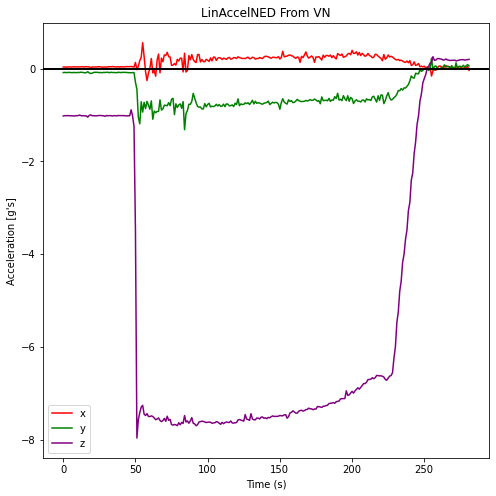

In [113]:
################## DATA FRAME ##################
datafile = '../Data/Fullscale2/' + LSM_datafile + '.csv'
fields = ['Timestamp', 'Accel X', 'Accel Y', 'Accel Z']

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)
df.drop(df.tail(1).index, inplace = True)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values
tdata_LSM = range(len(all_time))
tdata_LSM = tdata_LSM - all_time[0]
ax_g_LSM = np.array([float(val) for val in df['Accel X'].values])/9.8
ay_g_LSM = np.array([float(val) for val in df['Accel Y'].values])/9.8
az_g_LSM = np.array([float(val) for val in df['Accel Z'].values])/-9.8

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata_LSM, ax_g_LSM, color='red', label='x')
l3 = ax.plot(tdata_LSM, ay_g_LSM, color='green', label='y')
l4 = ax.plot(tdata_LSM, az_g_LSM, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
ax.legend()
plt.show()

In [114]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = '../Data/Fullscale2/' + SIFT1_datafile + '.csv'
fields = ['Timestamp', 'Pres',
  'Roll', 'Pitch', 'Yaw',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  'Accel X', 'Accel Y', 'Accel Z'
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata1 = all_time
tdata1 = tdata1 - all_time[0]

ax_vn1 = df['LinearAccelNed X']* ft
ay_vn1 = df['LinearAccelNed Y']* ft
az_vn1 = df['LinearAccelNed Z']* -ft

ax_g1 = df['LinearAccelNed X']/9.8
ay_g1 = df['LinearAccelNed Y']/9.8
az_g1 = df['LinearAccelNed Z']/-9.8

accel_xyz = [ax_vn1, ay_vn1, az_vn1]
v_vec, x_vec = hf.numerical_int(accel_xyz, tdata1)

vx_vn1, vy_vn1, vz_vn1 = v_vec[0], v_vec[1], v_vec[2]
x_vn1, y_vn1, z_vn1 = x_vec[0], x_vec[1], x_vec[2]

In [115]:
################## DATA FRAME ##################
datafile = '../Data/Fullscale2/' + SIFT2_datafile + '.csv'
fields = ['Timestamp', 'Pres',
  'Roll', 'Pitch', 'Yaw',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  'Accel X', 'Accel Y', 'Accel Z'
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata2 = all_time
tdata2 = tdata2 - all_time[0]

ax_vn2 = df['LinearAccelNed X']* ft
ay_vn2= df['LinearAccelNed Y']* ft
az_vn2 = df['LinearAccelNed Z']* -ft

ax_g2 = df['LinearAccelNed X']/9.8
ay_g2 = df['LinearAccelNed Y']/9.8
az_g2 = df['LinearAccelNed Z']/-9.8

accel_xyz = [ax_vn2, ay_vn2, az_vn2]
v_vec, x_vec = hf.numerical_int(accel_xyz, tdata2)

vx_vn2, vy_vn2, vz_vn2 = v_vec[0], v_vec[1], v_vec[2]
x_vn2, y_vn2, z_vn2 = x_vec[0], x_vec[1], x_vec[2]

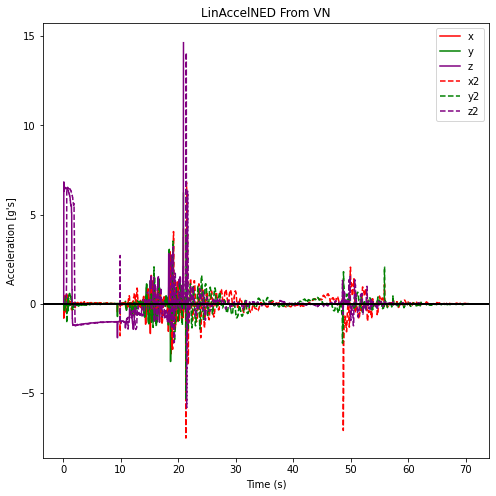

In [116]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata1, ax_g1, color='red', label='x')
l3 = ax.plot(tdata1, ay_g1, color='green', label='y')
l4 = ax.plot(tdata1, az_g1, color='purple', label='z')

l2 = ax.plot(tdata2, ax_g2, color='red', label='x2', linestyle='--')
l3 = ax.plot(tdata2, ay_g2, color='green', label='y2', linestyle='--')
l4 = ax.plot(tdata2, az_g2, color='purple', label='z2', linestyle='--')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
ax.legend()
plt.show()

In [120]:
P = df['Pres']
v_NASA_pres = np.vectorize(hf.nasa_pres)
altitude_NASA_pres = v_NASA_pres(P, P0=99.035, T0=288.1)*ft
#T0 really was 303.3966... this would've been biased by the RPi tho

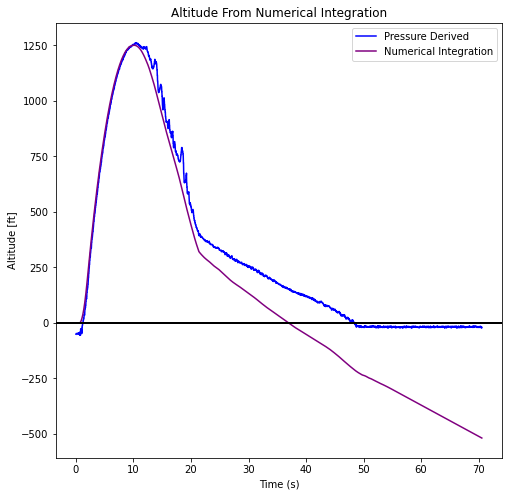

In [121]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata2, altitude_NASA_pres, color='blue', label='Pressure Derived')
l4 = ax.plot(tdata2, z_vn2, color='purple', label='Numerical Integration')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
plt.show()

## Filtered XY

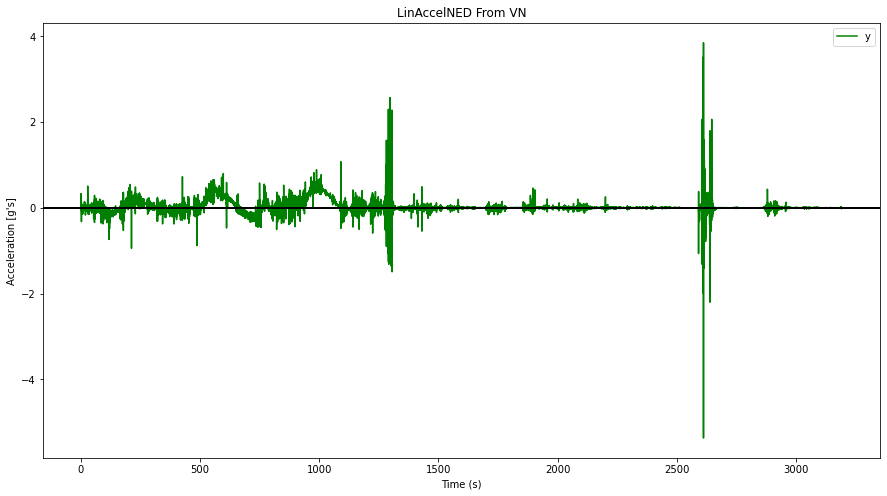

In [122]:
start = 0

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
#l2 = ax.plot(tdata[start:], ax_g[start:], color='red', label='x')
l2 = ax.plot(tdata[start:], ay_g[start:], color='green', label='y')
#l3 = ax.plot(tdata[start:end], ay_g[start:end], color='green', label='y')
#l4 = ax.plot(tdata[start:end], az_g[start:end], color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
#plt.ylim((-2, 2))

ax.legend()
plt.show()

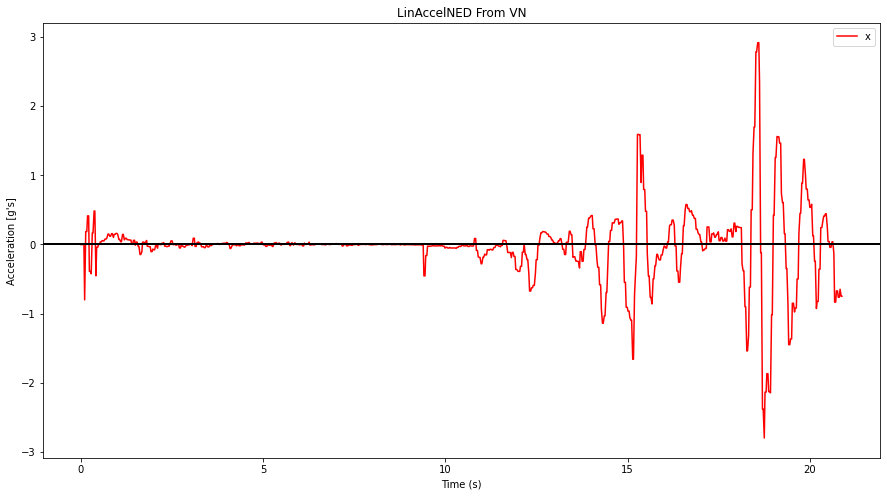

In [125]:
start = 0
end = -1

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata1[start:end], ax_g1[start:end], color='red', label='x')
#l3 = ax.plot(tdata[start:end], ay_g[start:end], color='green', label='y')
#l4 = ax.plot(tdata[start:end], az_g[start:end], color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
#plt.ylim((-2, 2))

ax.legend()
plt.show()

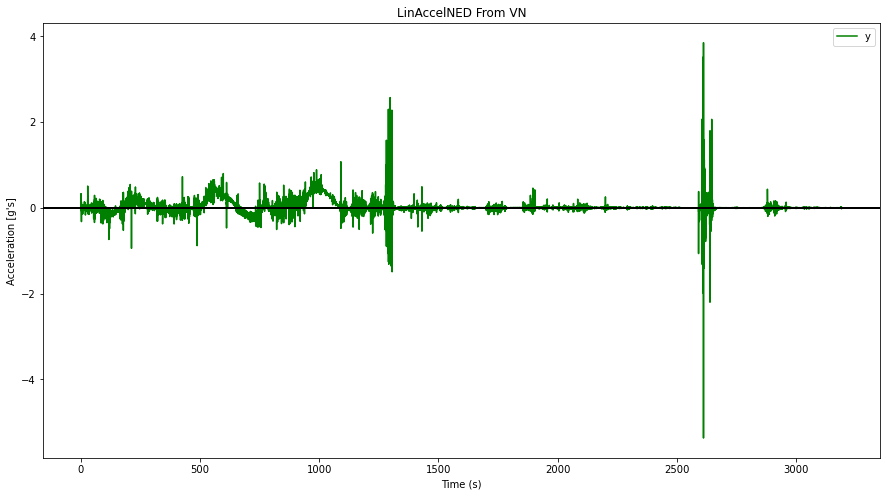

In [124]:
start = 0
end = -1

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
#l2 = ax.plot(tdata[start:end], ax_g[start:end], color='red', label='x')
l3 = ax.plot(tdata1[start:end], ay_g1[start:end], color='green', label='y')
#l4 = ax.plot(tdata[start:end], az_g[start:end], color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [g's]")
#plt.ylim((-2, 2))

ax.legend()
plt.show()

In [ ]:
accel_xyz = [ax_vn[start:end], ay_vn[start:end], az_vn[start:end]]
v_vec, x_vec = hf.numerical_int(accel_xyz, tdata)

vx_vn, vy_vn, vz_vn = v_vec[0], v_vec[1], v_vec[2]
x_vn, y_vn, z_vn = x_vec[0], x_vec[1], x_vec[2]

In [ ]:
def calc_moving_avg(axg21t, n, tdata21, dynamic_window=False, dynamic_n_timing=140, dynamic_n=80):        
    if dynamic_window:
        axg21s_1 = pd.Series(axg21t[0:dynamic_n_timing]).rolling(window=n).mean().iloc[n-1:].values
        axg21s_2 = pd.Series(axg21t).rolling(window=dynamic_n).mean().iloc[n-1:].values[dynamic_n_timing:]
        new_axg21s = list(axg21s_1) + list(axg21s_2)
    else:
        axg21s = pd.Series(axg21t).rolling(window=n).mean().iloc[n-1:].values
        new_axg21s = list(axg21s)
    while len(new_axg21s) < len(tdata21):
        new_axg21s = [0] + list(new_axg21s) + [0]
    return new_axg21s

## YPR Analysis

In [126]:
# Just using the raw values directly from the VN
byaw = df['Yaw'].values
bpitch = df['Pitch'].values
broll = df['Roll'].values

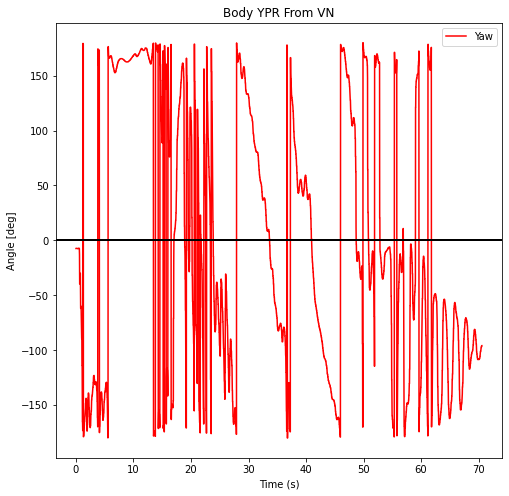

In [133]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata2, byaw, color='red', label='Yaw')
#l3 = ax.plot(tdata2, bpitch*-1+90, color='green', label='Pitch')
#l4 = ax.plot(tdata2, broll, color='purple', label='Roll')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body YPR From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()

In [134]:
v_len = len(byaw)

bYPR = np.zeros((3, v_len))
ffyaw = np.zeros(v_len)
ffpitch = np.zeros(v_len)
ffroll = np.zeros(v_len)

for i in range(v_len):
    bYPR[0, i], bYPR[1, i], bYPR[2, i] = byaw[i], bpitch[i], broll[i]
    
    YPR = [byaw[i], bpitch[i], broll[i]]

    # Account for IMU misalignment with launch vehicle frame
    post_YPR = hf.convert_abg(YPR)
    # Convert IMU data from body frame to fixed frame
    ff_output = hf.get_ffYPR_theta(post_YPR)
    
    ffyaw[i], ffpitch[i], ffroll[i] = ff_output[0], ff_output[1], ff_output[2]

ffYPR = np.stack((ffyaw, ffpitch, ffroll))
# ffYPR = np.reshape(ffYPR, (ffYPR.shape[2], ffYPR.shape[1]))

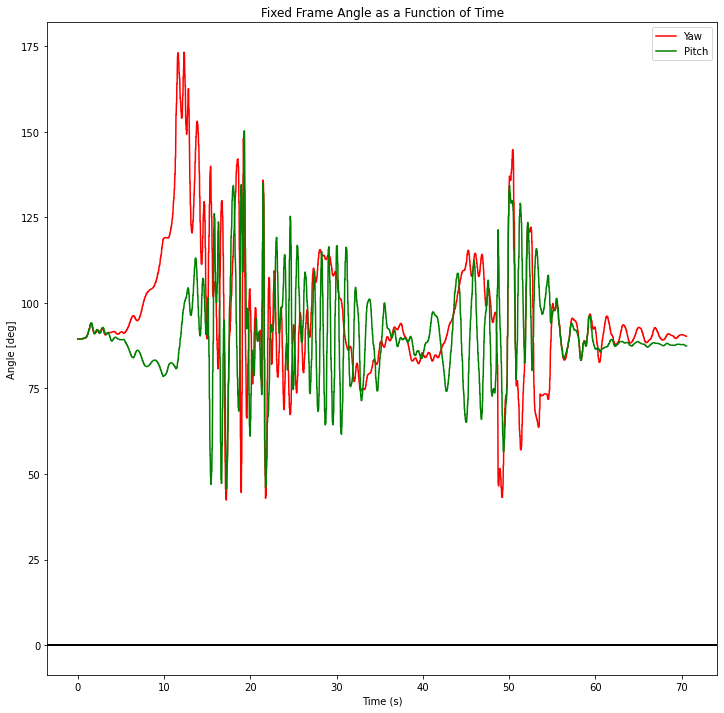

In [137]:
fig1 = plt.figure(1, figsize=(12,12))
ax = plt.subplot(111)
l2 = ax.plot(tdata2, ffyaw, 'r', label='Yaw')
l3 = ax.plot(tdata2, ffpitch, 'g', label='Pitch')
#l4 = ax.plot(tdata2, ffroll, 'b', label='Roll')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Fixed Frame Angle as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()

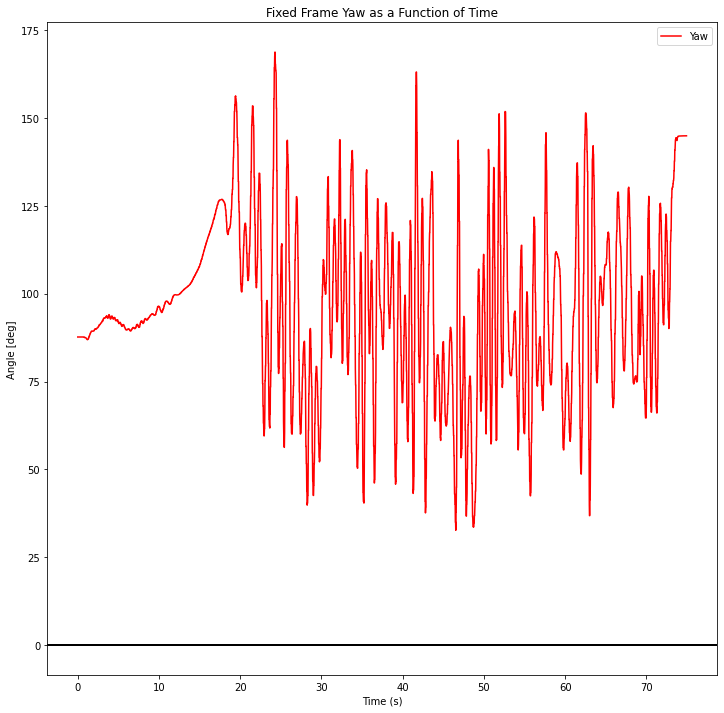

In [37]:
fig1 = plt.figure(1, figsize=(12,12))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ffyaw, 'r', label='Yaw')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Fixed Frame Yaw as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()

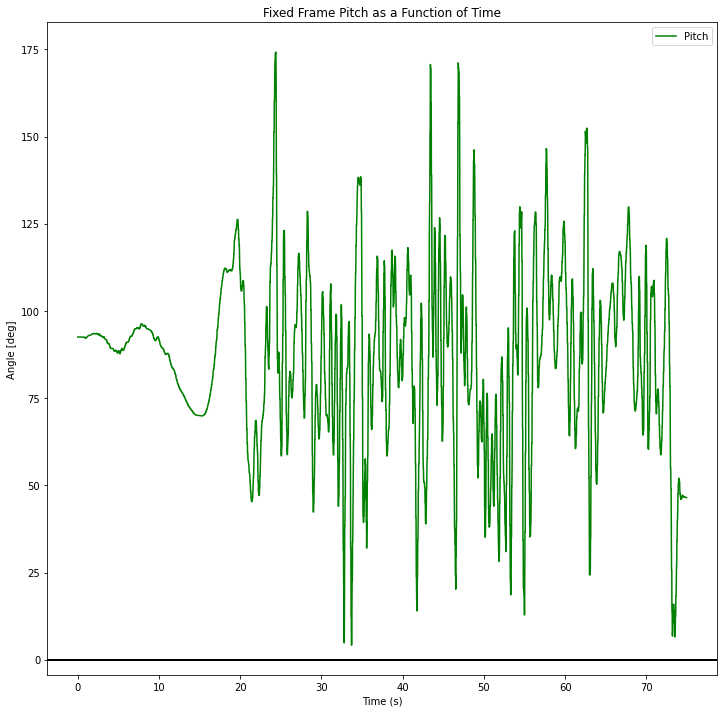

In [38]:
fig1 = plt.figure(1, figsize=(12,12))
ax = plt.subplot(111)
l3 = ax.plot(tdata, ffpitch, 'g', label='Pitch')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Fixed Frame Pitch as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()

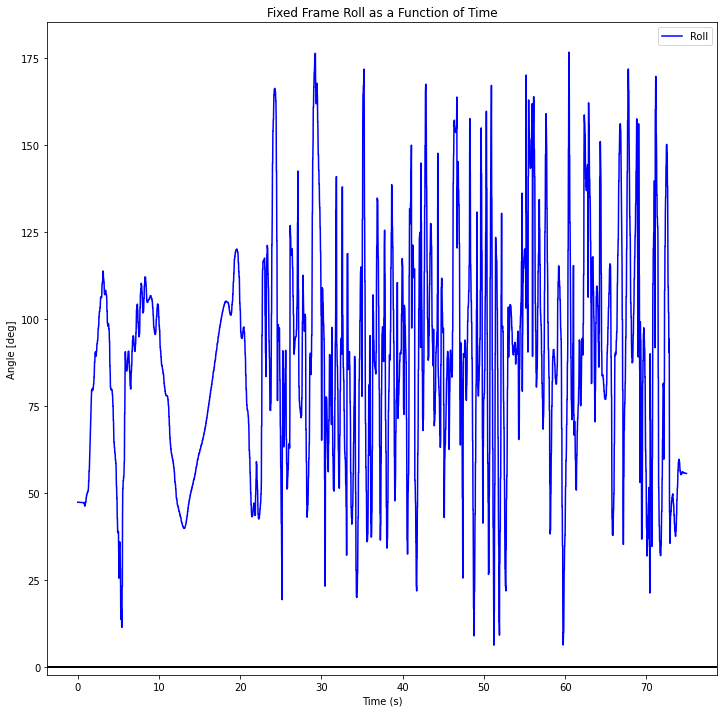

In [39]:
fig1 = plt.figure(1, figsize=(12,12))
ax = plt.subplot(111)
l4 = ax.plot(tdata, ffroll, 'b', label='Roll')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Fixed Frame Roll as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Angle [deg]")
ax.legend()
plt.show()